In [2]:
#import library
import numpy as np
# import cv2
import matplotlib.pyplot as plt
from processing_list import *

In [4]:
# baca image dengan pillow
img = Image.open('Image1-2.png')
img.show()

In [6]:
# convert to rgb
img_rgb = img.convert('RGB')
# convert to hsv
img_hsv = img.convert('HSV')

In [7]:
# ambil nilai rgb
r, g, b = img_rgb.split()
# ambil nilai hsv
h, s, v = img_hsv.split()


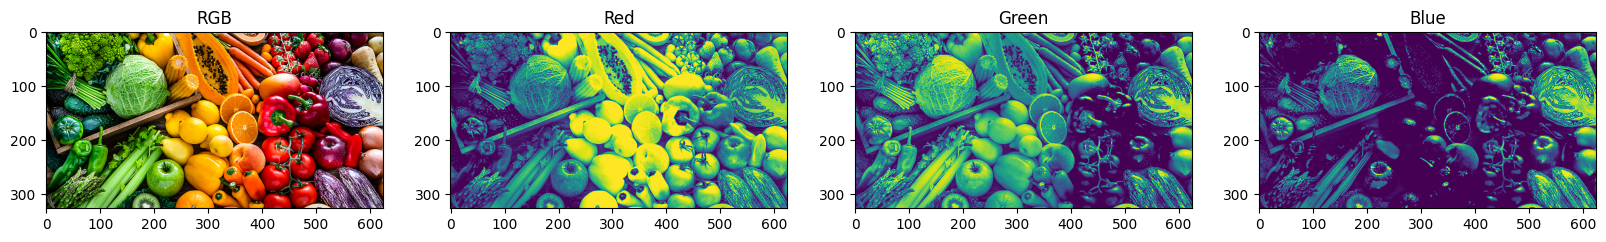

In [9]:
# plotting gambar rgb
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_rgb)
ax[0].set_title('RGB')
ax[1].imshow(r)
ax[1].set_title('Red')
ax[2].imshow(g)
ax[2].set_title('Green')
ax[3].imshow(b)
ax[3].set_title('Blue')
plt.show()

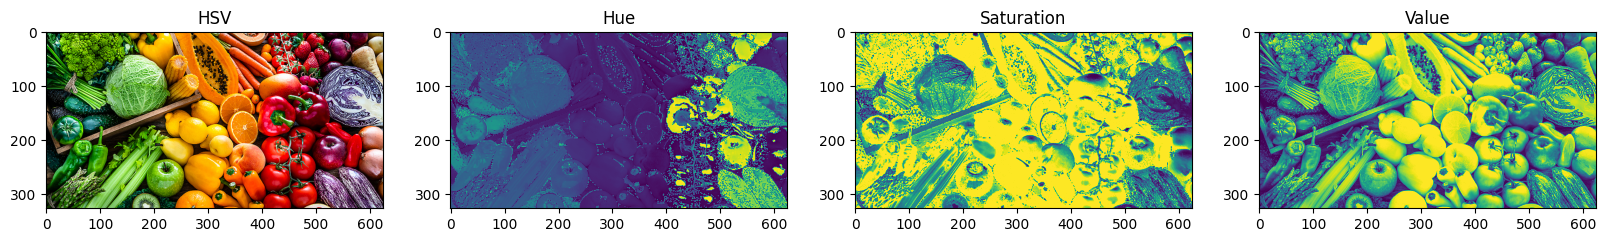

In [10]:
# plotting gambar hsv
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_hsv)
ax[0].set_title('HSV')
ax[1].imshow(h)
ax[1].set_title('Hue')
ax[2].imshow(s)
ax[2].set_title('Saturation')
ax[3].imshow(v)
ax[3].set_title('Value')
plt.show()


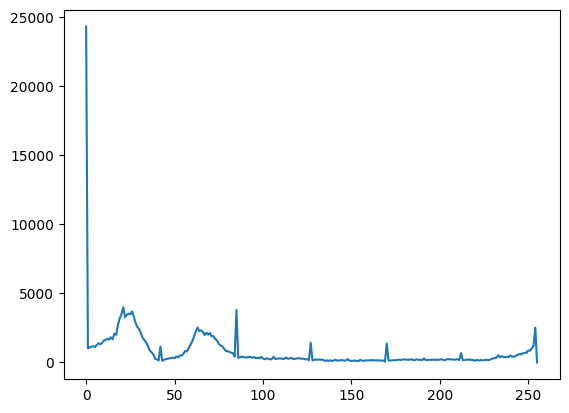

In [11]:
#melihat rentangan nilai pada channel hue
plt.plot(h.histogram())
plt.show()

In [63]:
# rentangan nilai pada channel hue yang akan digunakan
range_hue = [(0, 48), (49, 95), (135, 200)]

# perulangan untuk mengecek apakah nilai pada channel hue berada pada rentangan nilai yang telah ditentukan
hue_img = []
for warna in range_hue:
    hue_pixel = np.zeros((img_hsv.size[0], img_hsv.size[1]))
    for i in range(h.size[0]):
        for j in range(h.size[1]):
            if h.getpixel((i, j)) > warna[0] and h.getpixel((i,j)) < warna[1]:
                hue_pixel[i, j] = 1
    hue_img.append(hue_pixel)


In [64]:
print(hue_img[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


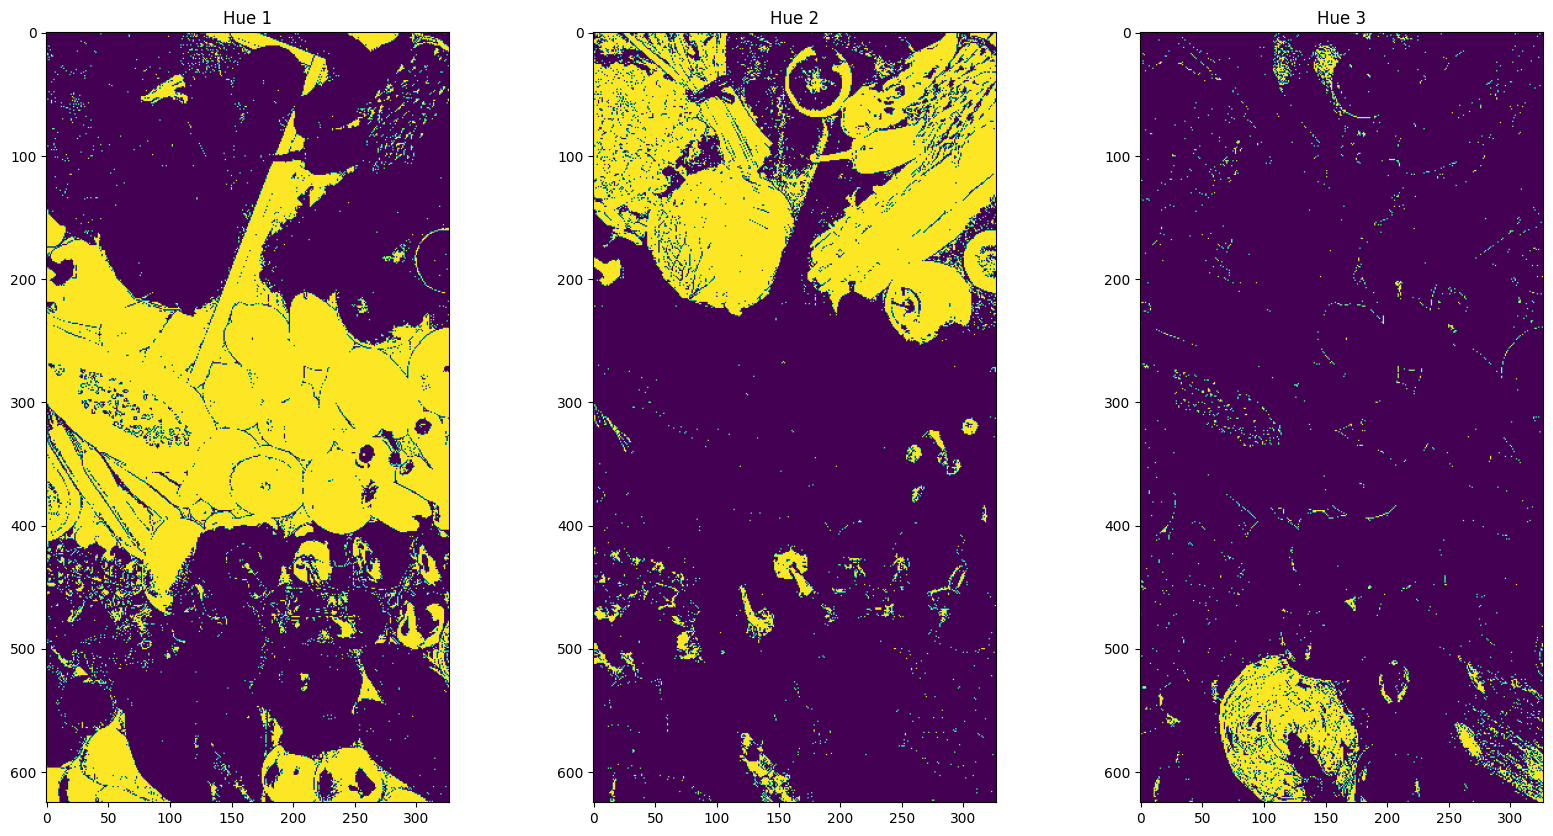

In [65]:
# plotting gambar hasil rentangan hue

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(hue_img[0])
ax[0].set_title('Hue 1')
ax[1].imshow(hue_img[1])
ax[1].set_title('Hue 2')
ax[2].imshow(hue_img[2])
ax[2].set_title('Hue 3')

# plt.xticks([])
# plt.yticks([])
plt.show()

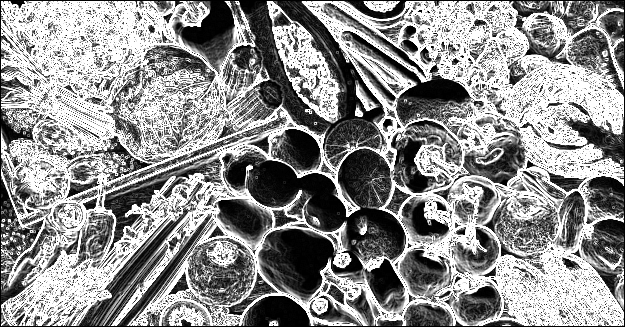

In [66]:
#edge detection pada channel value
value_edge = SobelFilter(v, 8)
value_edge

ubah tepi jadi item
erotion
gabung

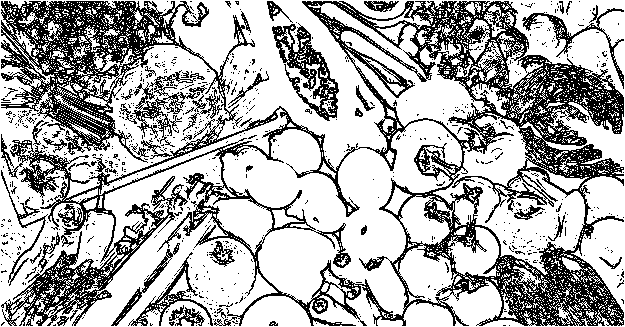

In [73]:
# change color edge to black
for i in range(value_edge.size[0]):
    for j in range(value_edge.size[1]):
        if value_edge.getpixel((i, j)) == 255:
            value_edge.putpixel((i, j), 0)
        else:
            value_edge.putpixel((i, j), 255)

value_edge

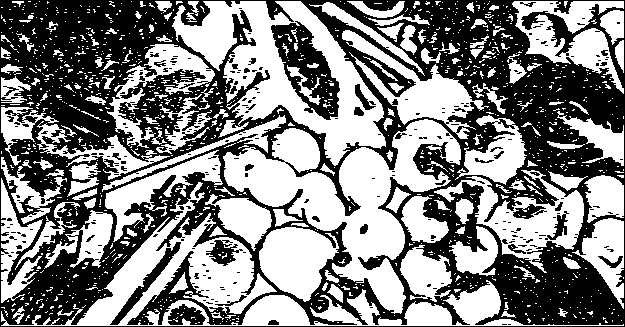

In [75]:
# erosion pada channel value yang telah dilakukan edge detection
value_erosion = Erotion(value_edge, 8)
value_erosion

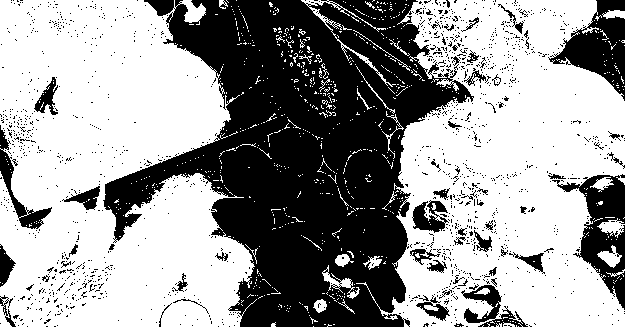

In [88]:
#gabungkan hasil edge detection dengan hasil hue yang telah ditentukan
for i in range(value_erosion.size[0]):
    for j in range(value_erosion.size[1]):
        if value_erosion.getpixel((i, j)) == 255 and hue_img[0][i, j] == 1:
            value_erosion.putpixel((i, j), 0)
        else:
            value_erosion.putpixel((i, j), 255)

value_erosion

5


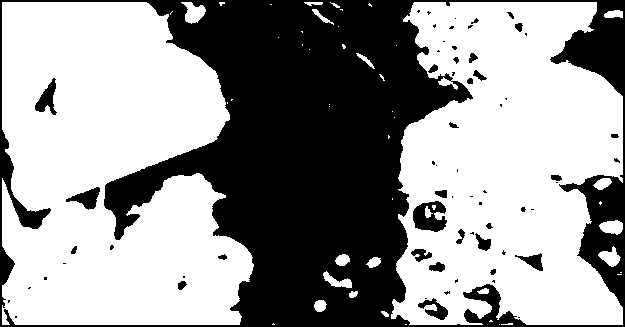

In [89]:
# hilangkan noise dengan median filter
value_median = ImgTestFilter(value_erosion, 1, 5)
value_median